<a href="https://colab.research.google.com/github/Shakira25/MyData/blob/main/Multi_morbidity_study_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
from google.colab import drive
drive.mount('/content/drive')

import os

# List files in the root directory of your Google Drive
root_dir = '/content/drive/My Drive/'
files_in_drive = os.listdir(root_dir)
print(files_in_drive)



# Replace 'file_name.csv' with the name of your CSV file
file_path = "/content/drive/My Drive/IDI_multimorbidity_data/multi_mob_cleaned_2.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Getting started.pdf', 'leon-gordis-epidemiology-4th-uploaded-by.pdf', 'METS-PROGRAM DOCS1.pdf', 'Data_queries_on_age_2023Jun13_sb_stj.xlsx', 'Heart.csv', 'Colab Notebooks', 'IDI_multimorbidity_data']


***Data cleaning and exploration***

In [101]:
df.head()

,idcno,gender,dob,age,returnvisitdate,height,baseline_weight,baseline_artregimen,baselinecd4,current_artregimen,...,opportunistic_inf2,HPTN_status2,HPTN_known2,cardiac_known2,alcohol_abuse_ever2,tobacco_abuse_ever2,multi_mob_status_2,multi_mob_status2_1,baseline_BMI,baseline_BMI_cat
0,5,Female,1-Jan-69,54,21-Apr-17,150.0,50.0,1j = TDF - 3TC - EFV,238.0,1j = TDF - 3TC - EFV,...,No,No,No,No,No,No,No,none,22.222221,18.5-24.9
1,5,Female,1-Jan-69,54,21-Jul-17,150.0,50.0,1j = TDF - 3TC - EFV,238.0,1j = TDF - 3TC - EFV,...,No,No,No,No,No,No,No,none,22.222221,18.5-24.9
2,5,Female,1-Jan-69,54,20-Jan-17,150.0,50.0,1j = TDF - 3TC - EFV,238.0,1j = TDF - 3TC - EFV,...,No,No,No,No,No,No,No,none,22.222221,18.5-24.9
3,5,Female,1-Jan-69,54,21-Oct-16,150.0,50.0,1j = TDF - 3TC - EFV,238.0,1j = TDF - 3TC - EFV,...,No,No,No,No,No,No,No,none,22.222221,18.5-24.9
4,5,Female,1-Jan-69,54,26-May-16,150.0,50.0,1j = TDF - 3TC - EFV,238.0,1j = TDF - 3TC - EFV,...,No,No,No,No,No,No,No,none,22.222221,18.5-24.9


In [102]:
#Total number of rows
# Get the total number of rows using len() function
total_rows = len(df)

print("Total number of rows:", total_rows) ##275410


# Get the total number of columns using shape attribute
total_columns = df.shape[1]

print("Total number of columns:", total_columns) ##39 columns

Total number of rows: 275410
Total number of columns: 39


In [103]:
##Check number of missing values per column

df.isna().sum()

idcno                      0
gender                     0
dob                        0
age                        0
returnvisitdate         7789
height                  3794
baseline_weight           83
baseline_artregimen      513
baselinecd4            42902
current_artregimen       603
weight                 27401
employment                 0
education_level            0
ce_pregnancy               0
followupstatus             0
current_cd4            38603
currentvl               5497
ART_reg_type             603
year                       0
artstartdate             513
age1                       0
last_visit_date            0
artduration              521
artduration_cat          521
curr_bmi_               4126
Baseline_reg_type        513
BaselineWHOstage1        256
currentvl_cat           5497
gender2                    0
opportunistic_inf2         0
HPTN_status2               0
HPTN_known2                0
cardiac_known2             0
alcohol_abuse_ever2        0
tobacco_abuse_

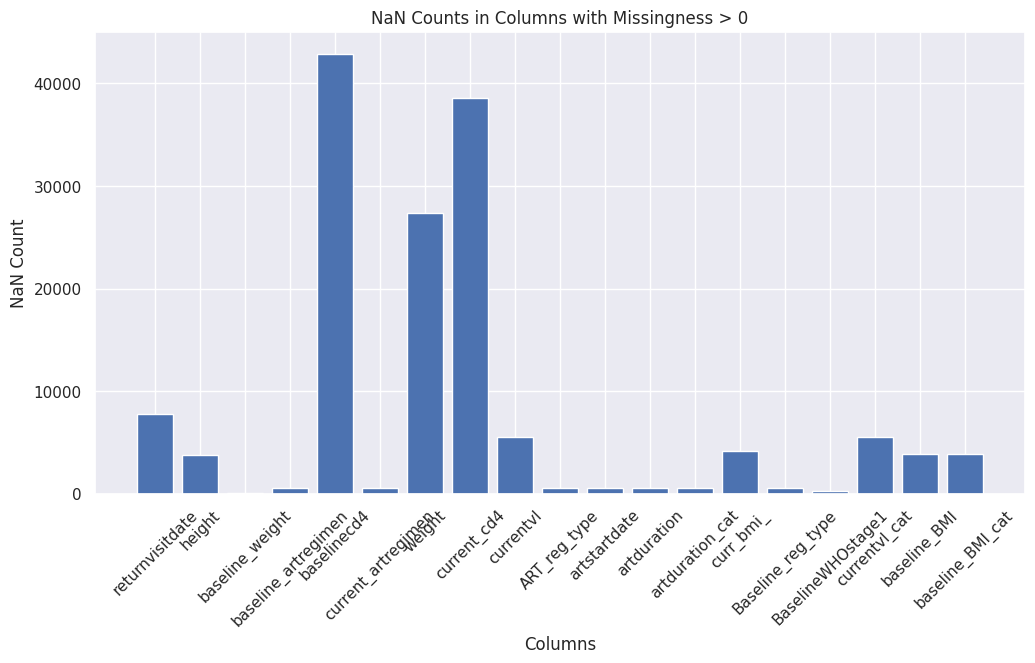

In [104]:
##Plot columns with a missingness >0

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of Null values in each column and reset index
na_counts = df.isna().sum().reset_index(name="n")

# Filter columns with missingness greater than 0
na_counts_filtered = na_counts[na_counts['n'] > 0]

# Create the bar plot with a widened x-axis
plt.figure(figsize=(12, 6))  # Increase the width of the figure
plt.bar(x="index", height='n', data=na_counts_filtered, align='center')
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Columns")
plt.ylabel("NaN Count")
plt.title("NaN Counts in Columns with Missingness > 0")

plt.show()


#df.isna().sum(). reset_index(name="n").plot.bar(x="index",y='n',rot=45)

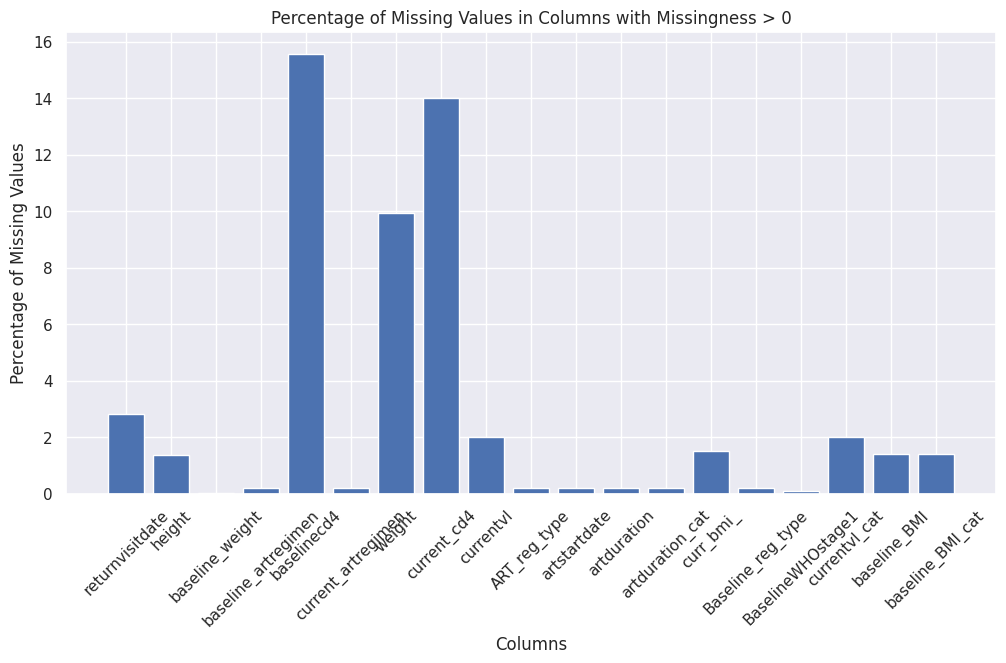

In [105]:
# Calculate the percentage of NaN values in each column and reset index
na_percentage = (df.isna().sum() / len(df)) * 100
na_percentage = na_percentage.reset_index(name="percentage")

# Filter columns with missingness greater than 0
na_percentage_filtered = na_percentage[na_percentage['percentage'] > 0]

# Create the bar plot with a widened x-axis
plt.figure(figsize=(12, 6))  # Increase the width of the figure
plt.bar(x="index", height='percentage', data=na_percentage_filtered, align='center')
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values in Columns with Missingness > 0")

plt.show()


In [106]:
##Drop columns with missgness >5%
# Identify columns with missingness greater than 5%
columns_to_drop = na_percentage[na_percentage['percentage'] > 5]['index']

# Drop columns with missingness greater than 5%
df_dropped = df.drop(columns=columns_to_drop)

# Print the dropped columns (optional)
print("Dropped columns:")
print(columns_to_drop)


# Get the total number of columns using shape attribute
total_columns = df_dropped.shape[1]

print("Total number of columns:", total_columns) ##Columns are now 36. They have reduced by 3.

Dropped columns:
8     baselinecd4
10         weight
15    current_cd4
Name: index, dtype: object
Total number of columns: 36


In [107]:
df_dropped.isna().sum()

idcno                     0
gender                    0
dob                       0
age                       0
returnvisitdate        7789
height                 3794
baseline_weight          83
baseline_artregimen     513
current_artregimen      603
employment                0
education_level           0
ce_pregnancy              0
followupstatus            0
currentvl              5497
ART_reg_type            603
year                      0
artstartdate            513
age1                      0
last_visit_date           0
artduration             521
artduration_cat         521
curr_bmi_              4126
Baseline_reg_type       513
BaselineWHOstage1       256
currentvl_cat          5497
gender2                   0
opportunistic_inf2        0
HPTN_status2              0
HPTN_known2               0
cardiac_known2            0
alcohol_abuse_ever2       0
tobacco_abuse_ever2       0
multi_mob_status_2        0
multi_mob_status2_1       0
baseline_BMI           3826
baseline_BMI_cat    

In [108]:
data_types = df_dropped.dtypes
print(data_types)

idcno                    int64
gender                  object
dob                     object
age                      int64
returnvisitdate         object
height                 float64
baseline_weight        float64
baseline_artregimen     object
current_artregimen      object
employment              object
education_level         object
ce_pregnancy             int64
followupstatus          object
currentvl              float64
ART_reg_type            object
year                    object
artstartdate            object
age1                    object
last_visit_date         object
artduration            float64
artduration_cat         object
curr_bmi_               object
Baseline_reg_type       object
BaselineWHOstage1       object
currentvl_cat           object
gender2                 object
opportunistic_inf2      object
HPTN_status2            object
HPTN_known2             object
cardiac_known2          object
alcohol_abuse_ever2     object
tobacco_abuse_ever2     object
multi_mo

In [109]:
###Replace missing values

# Fill missing values with the most common character or factor for string columns
string_cols = df_dropped.select_dtypes(include='object').columns
for col in string_cols:
    most_common_value = df_dropped[col].mode()[0]
    df_dropped[col].fillna(most_common_value, inplace=True)


# Fill missing values with the mean for float columns
float_columns = df_dropped.select_dtypes(include='float').columns
df_dropped[float_columns] = df_dropped[float_columns].fillna(df_dropped[float_columns].mean())



# Fill missing values with the mean for int columns
int_columns = df.select_dtypes(include='int').columns
# Convert int columns to float
df[int_columns] = df[int_columns].astype(float)
# Fill missing values with the mean
df[int_columns] = df[int_columns].fillna(df[int_columns].mean())
# Convert back to int if needed
df[int_columns] = df[int_columns].astype(int)


# Fill missing values with the mean for numeric columns
#numeric_cols = df_dropped.select_dtypes(include=np.number).columns
#for col in numeric_cols:
#    col_mean = df_dropped[col].mean()
#    df_dropped[col].fillna(col_mean, inplace=True)
#
# Now, 'df_dropped' contains the DataFrame with missing values replaced as specified above

In [110]:
##Missing values have been replaced
df_dropped.isna().sum()

idcno                  0
gender                 0
dob                    0
age                    0
returnvisitdate        0
height                 0
baseline_weight        0
baseline_artregimen    0
current_artregimen     0
employment             0
education_level        0
ce_pregnancy           0
followupstatus         0
currentvl              0
ART_reg_type           0
year                   0
artstartdate           0
age1                   0
last_visit_date        0
artduration            0
artduration_cat        0
curr_bmi_              0
Baseline_reg_type      0
BaselineWHOstage1      0
currentvl_cat          0
gender2                0
opportunistic_inf2     0
HPTN_status2           0
HPTN_known2            0
cardiac_known2         0
alcohol_abuse_ever2    0
tobacco_abuse_ever2    0
multi_mob_status_2     0
multi_mob_status2_1    0
baseline_BMI           0
baseline_BMI_cat       0
dtype: int64

In [111]:
# Subsetting to keep only rows with unique IDs
unique_ids_df = df_dropped.drop_duplicates(subset=['idcno'])

print(unique_ids_df)

#unique_ids_df.head()

        idcno  gender        dob  age returnvisitdate      height  \
0           5  Female   1-Jan-69   54       21-Apr-17  150.000000   
6           8  Female   1-Jan-66   57        9-Mar-20  176.000000   
29         23  Female   1-Jan-58   65        2-Jun-22  168.000000   
59         71  Female   1-Jan-59   64        2-Nov-21  160.000000   
91         83  Female   1-Jun-75   47       31-May-19  151.500000   
...       ...     ...        ...  ...             ...         ...   
275404  35802  Female  12-Jun-45   77       18-May-23  171.000000   
275406  35803  Female  12-Aug-85   37       16-May-23  154.300000   
275407  35804  Female   2-Feb-05   18       17-May-23  155.500000   
275408  35805    Male  25-Sep-83   39       19-May-23  172.500000   
275409  35806  Female   1-Jan-98   25        3-Nov-20  161.486798   

        baseline_weight      baseline_artregimen      current_artregimen  \
0             50.000000     1j = TDF - 3TC - EFV    1j = TDF - 3TC - EFV   
6             64.00

In [112]:
# Get the column names
column_names = unique_ids_df.columns

print(column_names)

Index(['idcno', 'gender', 'dob', 'age', 'returnvisitdate', 'height',
       'baseline_weight', 'baseline_artregimen', 'current_artregimen',
       'employment', 'education_level', 'ce_pregnancy', 'followupstatus',
       'currentvl', 'ART_reg_type', 'year', 'artstartdate', 'age1',
       'last_visit_date', 'artduration', 'artduration_cat', 'curr_bmi_',
       'Baseline_reg_type', 'BaselineWHOstage1', 'currentvl_cat', 'gender2',
       'opportunistic_inf2', 'HPTN_status2', 'HPTN_known2', 'cardiac_known2',
       'alcohol_abuse_ever2', 'tobacco_abuse_ever2', 'multi_mob_status_2',
       'multi_mob_status2_1', 'baseline_BMI', 'baseline_BMI_cat'],
      dtype='object')


In [113]:
#Drop unecessary columns

# Drop certain columns using the drop() method
columns_to_remove = ['dob', 'returnvisitdate','baseline_artregimen','current_artregimen','employment','last_visit_date','artstartdate','year']
unique_ids_df = unique_ids_df.drop(columns=columns_to_remove)

print(unique_ids_df)

        idcno  gender  age      height  baseline_weight education_level  \
0           5  Female   54  150.000000        50.000000   Not specified   
6           8  Female   57  176.000000        64.000000   Not specified   
29         23  Female   65  168.000000        50.000000   Not specified   
59         71  Female   64  160.000000        65.000000   Not specified   
91         83  Female   47  151.500000        50.000000   Not specified   
...       ...     ...  ...         ...              ...             ...   
275404  35802  Female   77  171.000000        66.000000   Not specified   
275406  35803  Female   37  154.300000        43.000000           S1-S4   
275407  35804  Female   18  155.500000        52.000000           S1-S4   
275408  35805    Male   39  172.500000        70.000000           S5-S6   
275409  35806  Female   25  161.486798        66.506194   Not specified   

        ce_pregnancy followupstatus      currentvl ART_reg_type  ...  \
0                  0       

In [115]:
# Round off all float data types to whole numbers
unique_ids_df = unique_ids_df.round(0)


# Convert float columns to integers
float_columns = unique_ids_df.select_dtypes(include='float').columns
unique_ids_df[float_columns] = unique_ids_df[float_columns].astype(int)

# Convert the numeric values to integers, non-numeric values will be converted to NaN
#numeric_columns = unique_ids_df.select_dtypes(include='number').columns
#unique_ids_df[numeric_columns] = unique_ids_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(unique_ids_df)

        idcno  gender  age  height  baseline_weight education_level  \
0           5  Female   54     150               50   Not specified   
6           8  Female   57     176               64   Not specified   
29         23  Female   65     168               50   Not specified   
59         71  Female   64     160               65   Not specified   
91         83  Female   47     152               50   Not specified   
...       ...     ...  ...     ...              ...             ...   
275404  35802  Female   77     171               66   Not specified   
275406  35803  Female   37     154               43           S1-S4   
275407  35804  Female   18     156               52           S1-S4   
275408  35805    Male   39     172               70           S5-S6   
275409  35806  Female   25     161               67   Not specified   

        ce_pregnancy followupstatus  currentvl ART_reg_type  ...  \
0                  0           Dead          1          EFV  ...   
6          

In [116]:
unique_ids_df.isna().sum()

idcno                  0
gender                 0
age                    0
height                 0
baseline_weight        0
education_level        0
ce_pregnancy           0
followupstatus         0
currentvl              0
ART_reg_type           0
age1                   0
artduration            0
artduration_cat        0
curr_bmi_              0
Baseline_reg_type      0
BaselineWHOstage1      0
currentvl_cat          0
gender2                0
opportunistic_inf2     0
HPTN_status2           0
HPTN_known2            0
cardiac_known2         0
alcohol_abuse_ever2    0
tobacco_abuse_ever2    0
multi_mob_status_2     0
multi_mob_status2_1    0
baseline_BMI           0
baseline_BMI_cat       0
dtype: int64

In [117]:
#Data Preprocessing Part 1

#Check the number of unique value from all of the object datatype
unique_ids_df.select_dtypes(include='object').nunique()

gender                 2
education_level        7
followupstatus         5
ART_reg_type           3
age1                   7
artduration_cat        5
curr_bmi_              3
Baseline_reg_type      3
BaselineWHOstage1      4
currentvl_cat          2
gender2                2
opportunistic_inf2     2
HPTN_status2           2
HPTN_known2            2
cardiac_known2         2
alcohol_abuse_ever2    2
tobacco_abuse_ever2    2
multi_mob_status_2     2
multi_mob_status2_1    4
baseline_BMI_cat       4
dtype: int64

In [118]:
# Get the list of column names
columns = unique_ids_df.columns.tolist()
print(columns)

['idcno', 'gender', 'age', 'height', 'baseline_weight', 'education_level', 'ce_pregnancy', 'followupstatus', 'currentvl', 'ART_reg_type', 'age1', 'artduration', 'artduration_cat', 'curr_bmi_', 'Baseline_reg_type', 'BaselineWHOstage1', 'currentvl_cat', 'gender2', 'opportunistic_inf2', 'HPTN_status2', 'HPTN_known2', 'cardiac_known2', 'alcohol_abuse_ever2', 'tobacco_abuse_ever2', 'multi_mob_status_2', 'multi_mob_status2_1', 'baseline_BMI', 'baseline_BMI_cat']


In [119]:
data_types = unique_ids_df.dtypes
print(data_types)

idcno                   int64
gender                 object
age                     int64
height                  int64
baseline_weight         int64
education_level        object
ce_pregnancy            int64
followupstatus         object
currentvl               int64
ART_reg_type           object
age1                   object
artduration             int64
artduration_cat        object
curr_bmi_              object
Baseline_reg_type      object
BaselineWHOstage1      object
currentvl_cat          object
gender2                object
opportunistic_inf2     object
HPTN_status2           object
HPTN_known2            object
cardiac_known2         object
alcohol_abuse_ever2    object
tobacco_abuse_ever2    object
multi_mob_status_2     object
multi_mob_status2_1    object
baseline_BMI            int64
baseline_BMI_cat       object
dtype: object


In [120]:
# Using len() function
for column in unique_ids_df.columns:
    column_length = len(unique_ids_df[column])
    print(f"Column '{column}' has {column_length} rows")


Column 'idcno' has 11760 rows
Column 'gender' has 11760 rows
Column 'age' has 11760 rows
Column 'height' has 11760 rows
Column 'baseline_weight' has 11760 rows
Column 'education_level' has 11760 rows
Column 'ce_pregnancy' has 11760 rows
Column 'followupstatus' has 11760 rows
Column 'currentvl' has 11760 rows
Column 'ART_reg_type' has 11760 rows
Column 'age1' has 11760 rows
Column 'artduration' has 11760 rows
Column 'artduration_cat' has 11760 rows
Column 'curr_bmi_' has 11760 rows
Column 'Baseline_reg_type' has 11760 rows
Column 'BaselineWHOstage1' has 11760 rows
Column 'currentvl_cat' has 11760 rows
Column 'gender2' has 11760 rows
Column 'opportunistic_inf2' has 11760 rows
Column 'HPTN_status2' has 11760 rows
Column 'HPTN_known2' has 11760 rows
Column 'cardiac_known2' has 11760 rows
Column 'alcohol_abuse_ever2' has 11760 rows
Column 'tobacco_abuse_ever2' has 11760 rows
Column 'multi_mob_status_2' has 11760 rows
Column 'multi_mob_status2_1' has 11760 rows
Column 'baseline_BMI' has 1176

In [121]:
# Desired number of rows
desired_rows = 11760

# Create a list to store the names of columns that don't have the desired number of rows
columns_with_different_rows = []

# Check the length of each column
for column in unique_ids_df.columns:
    column_length = len(unique_ids_df[column])
    if column_length != desired_rows:
        columns_with_different_rows.append(column)

# Print the columns that don't have the desired number of rows
print("Columns with a different number of rows:")
print(columns_with_different_rows)

Columns with a different number of rows:
[]


In [122]:
# Number of columns whose datatype is object
num_object_columns = len(unique_ids_df.select_dtypes(include='object').columns)
print("Number of object columns:", num_object_columns)

Number of object columns: 20


In [123]:
# Convert all object columns to categorical data type
for col in unique_ids_df.select_dtypes(include='object'):
    df[col] = pd.Categorical(df[col])

data_types = unique_ids_df.dtypes
print(data_types)



idcno                   int64
gender                 object
age                     int64
height                  int64
baseline_weight         int64
education_level        object
ce_pregnancy            int64
followupstatus         object
currentvl               int64
ART_reg_type           object
age1                   object
artduration             int64
artduration_cat        object
curr_bmi_              object
Baseline_reg_type      object
BaselineWHOstage1      object
currentvl_cat          object
gender2                object
opportunistic_inf2     object
HPTN_status2           object
HPTN_known2            object
cardiac_known2         object
alcohol_abuse_ever2    object
tobacco_abuse_ever2    object
multi_mob_status_2     object
multi_mob_status2_1    object
baseline_BMI            int64
baseline_BMI_cat       object
dtype: object


In [124]:
# Get the list of column names
columns = unique_ids_df.columns.tolist()

# Initialize an empty list to store the names of categorical variables
categorical_variables = []

# Loop through each column and check if it contains categorical data
for column in columns:
    if pd.api.types.is_categorical_dtype(unique_ids_df[column]):
        categorical_variables.append(column)

# Print the list of categorical variables
print("Categorical Variables:")
print(categorical_variables)

Categorical Variables:
[]


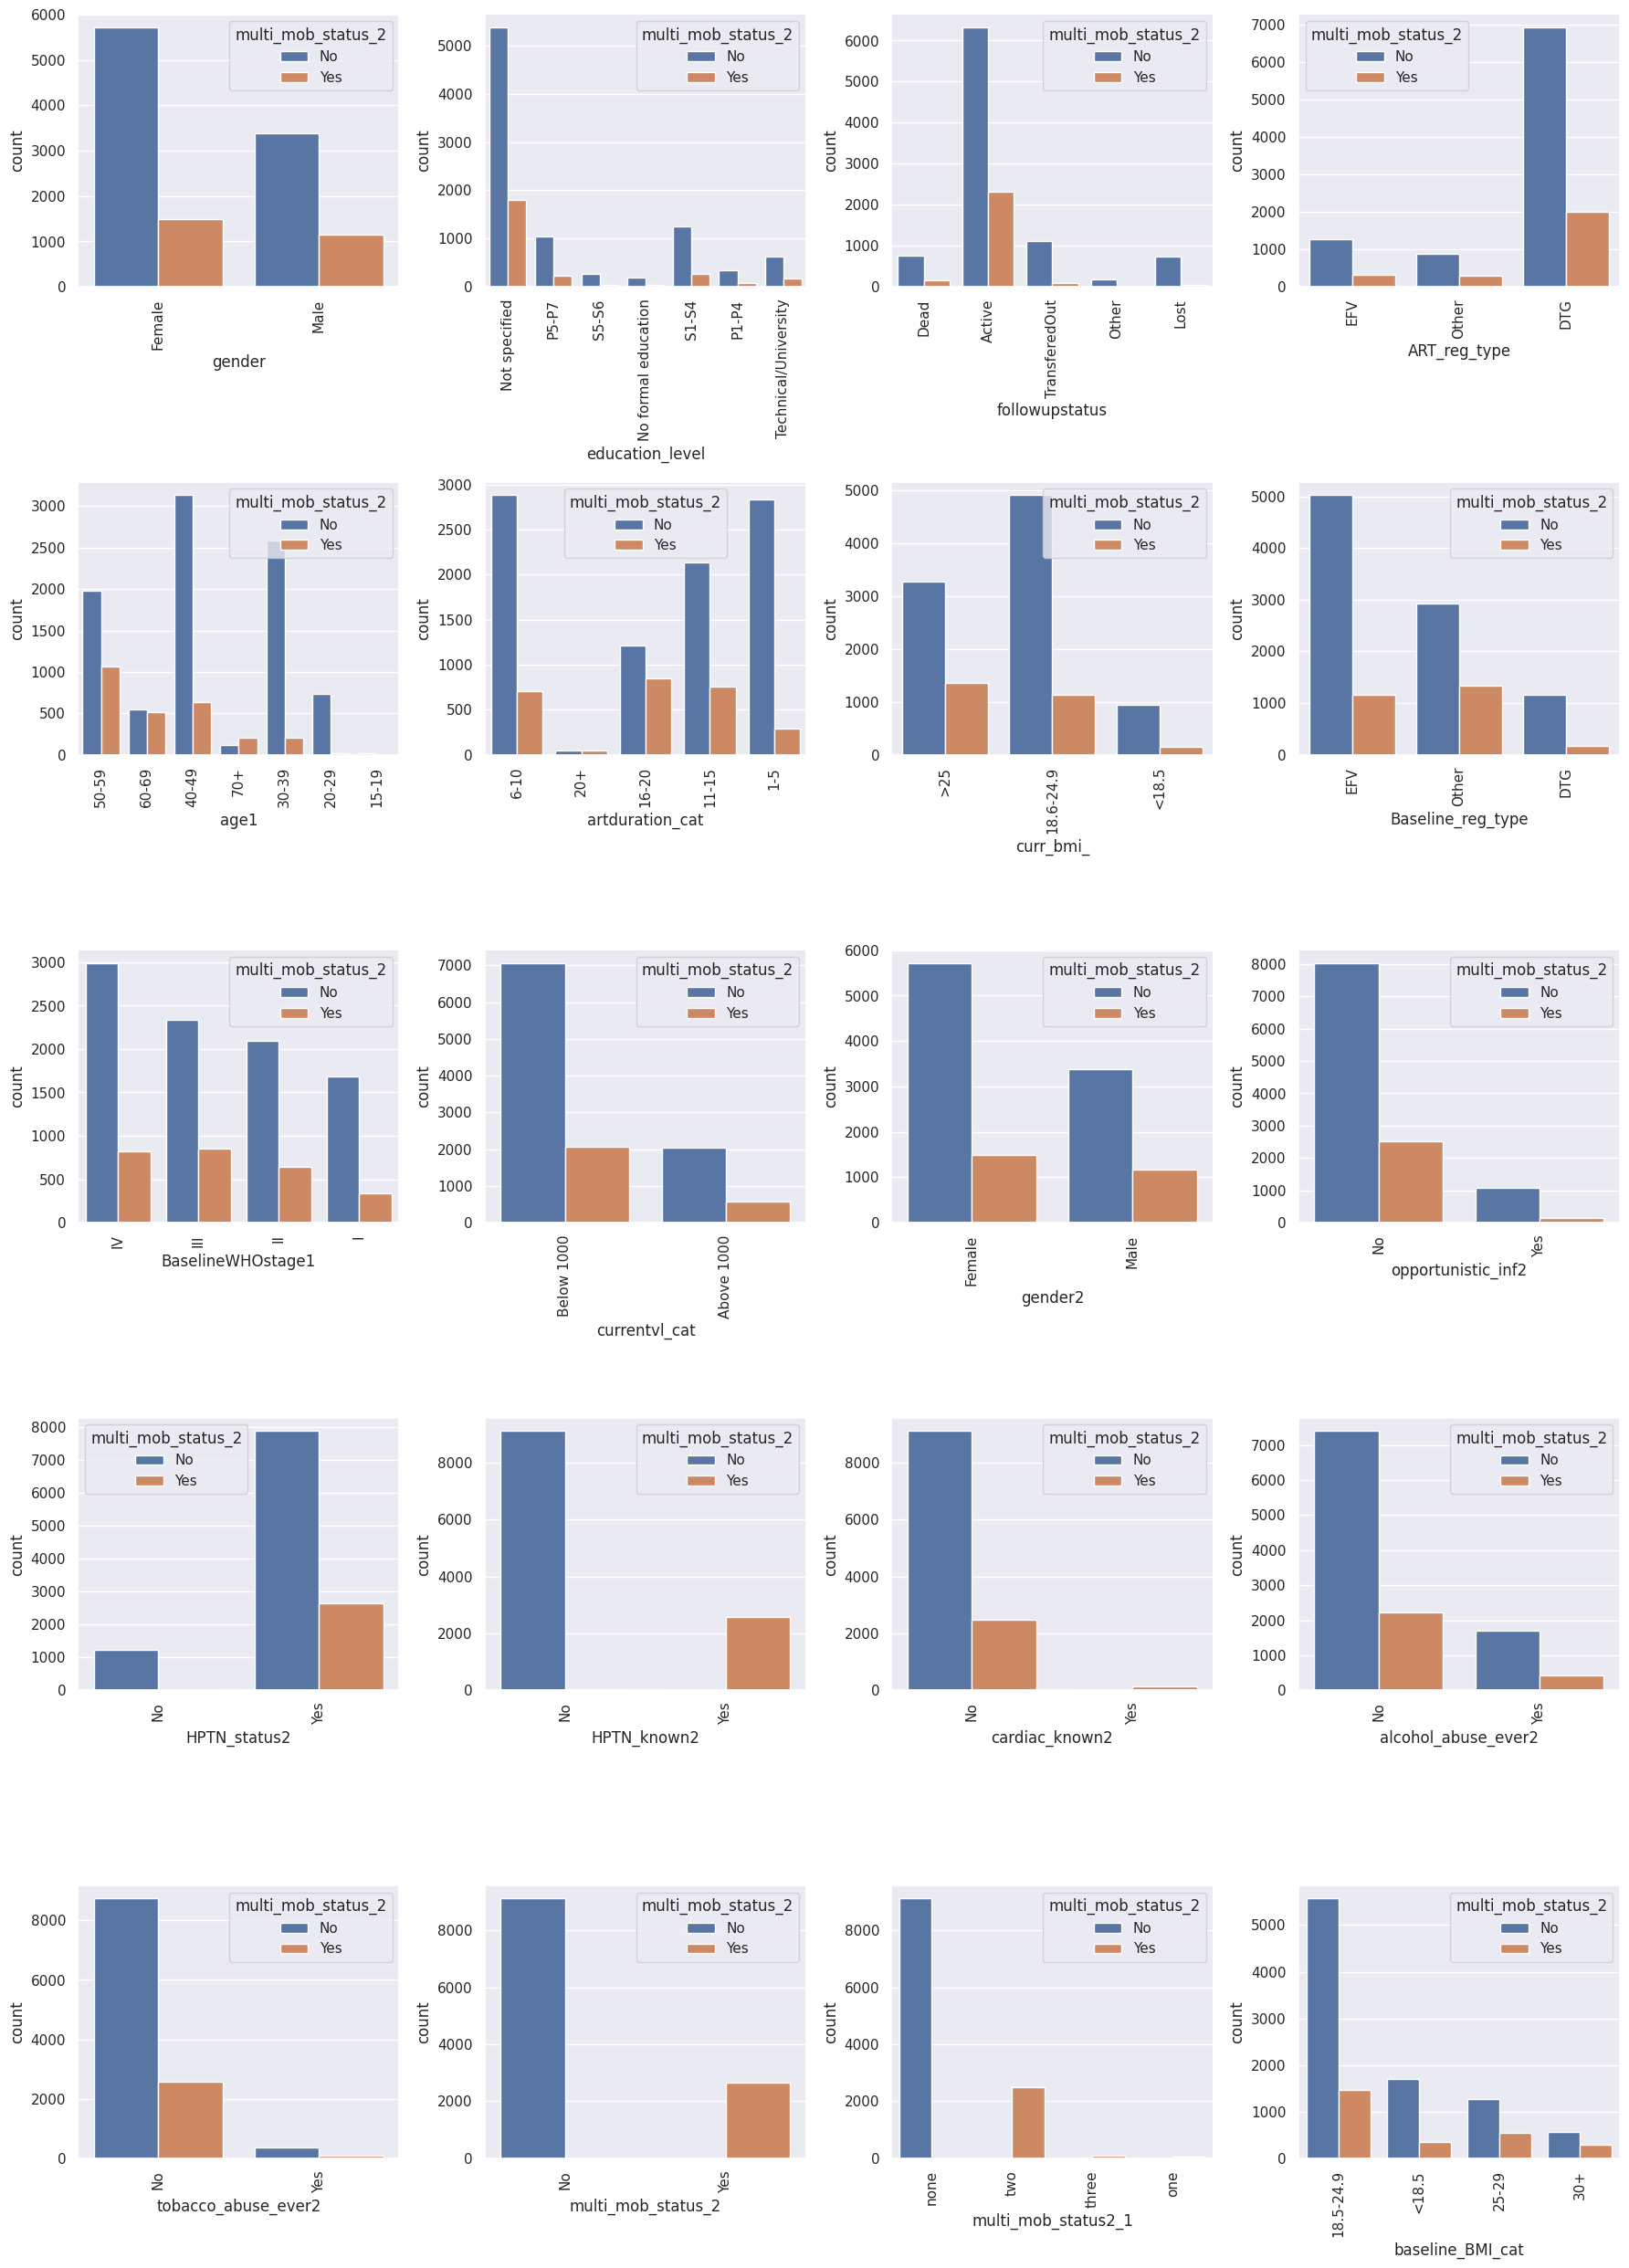

In [125]:
# List of categorical variables to plot
cat_vars = ['gender', 'education_level', 'followupstatus', 'ART_reg_type', 'age1',
            'artduration_cat', 'curr_bmi_', 'Baseline_reg_type', 'BaselineWHOstage1',
            'currentvl_cat', 'gender2', 'opportunistic_inf2', 'HPTN_status2', 'HPTN_known2',
            'cardiac_known2', 'alcohol_abuse_ever2', 'tobacco_abuse_ever2', 'multi_mob_status_2',
            'multi_mob_status2_1', 'baseline_BMI_cat']

# Create figure with subplots
num_rows = (len(cat_vars) + 3) // 4
fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(18, 5 * num_rows))
axs = axs.flatten()

# Create bar plot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='multi_mob_status_2', data=unique_ids_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjust spacing between subplots
fig.tight_layout()

# Remove any empty subplots
for j in range(len(cat_vars), num_rows * 4):
    fig.delaxes(axs[j])

# Show plot
plt.show()




<ipython-input-126-9eaccb09f97b>:23: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
<ipython-input-126-9eaccb09f97b>:23: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


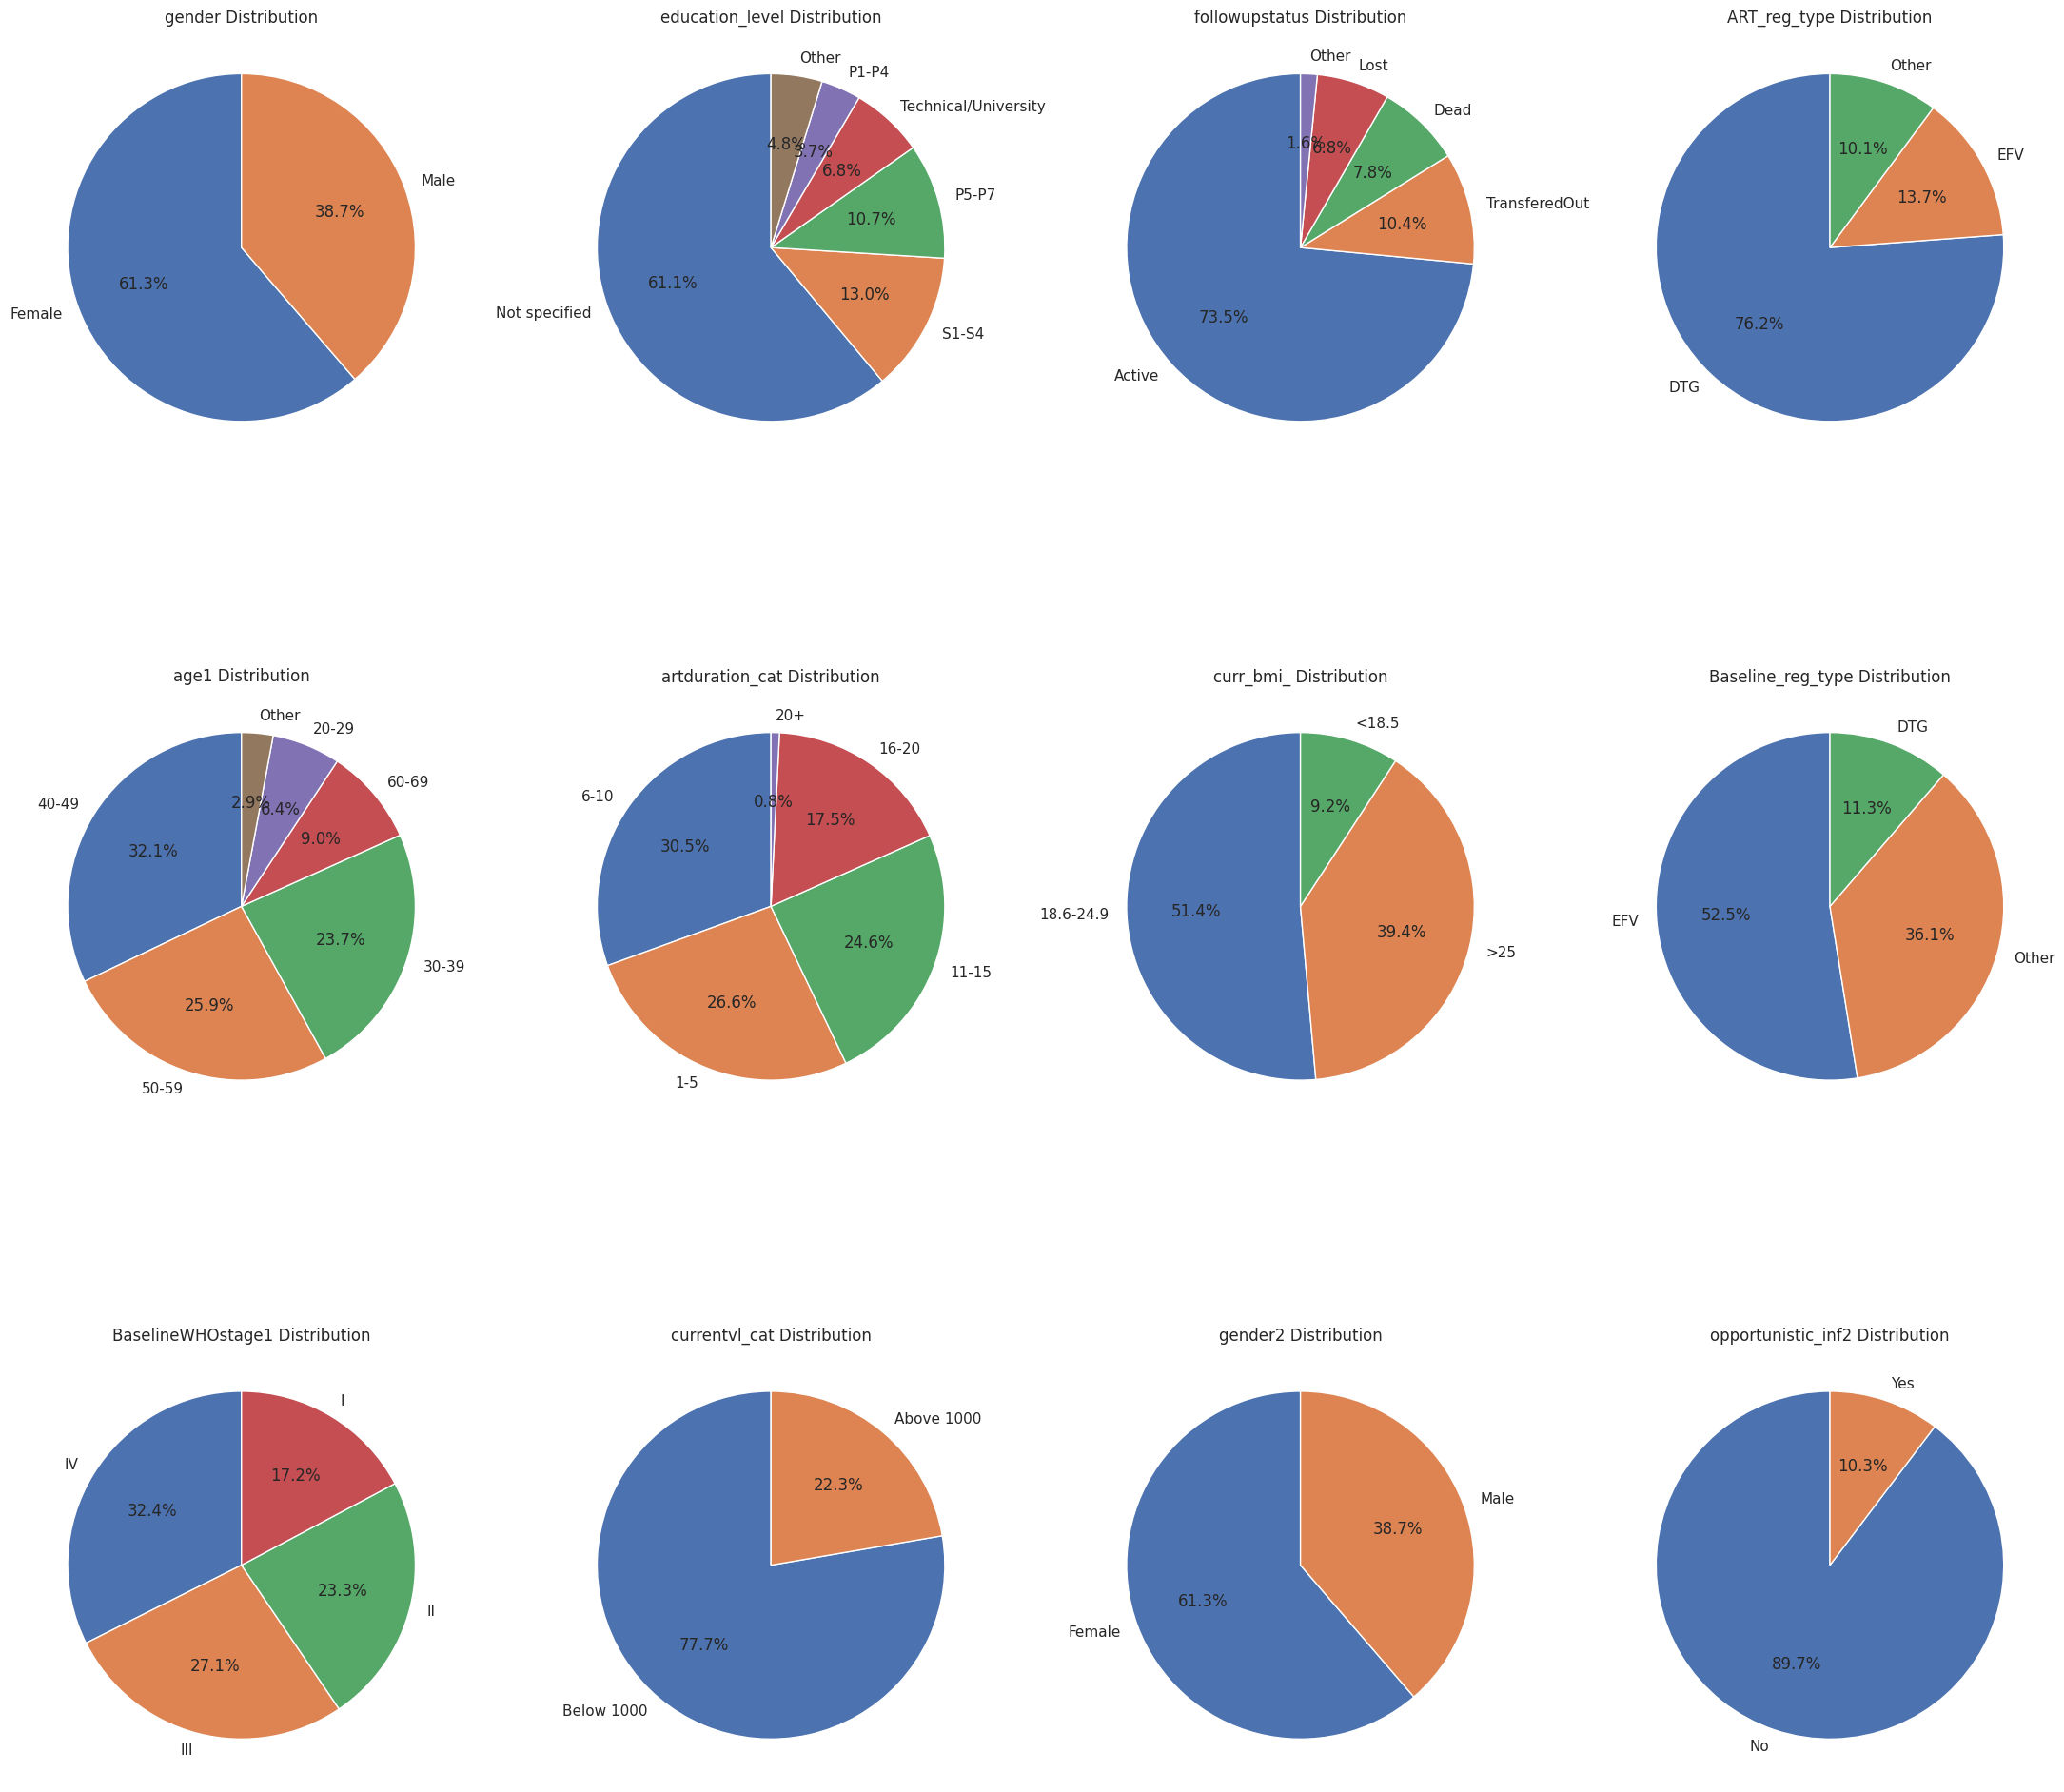

In [126]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['gender', 'education_level', 'followupstatus', 'ART_reg_type', 'age1',
            'artduration_cat', 'curr_bmi_', 'Baseline_reg_type', 'BaselineWHOstage1',
            'currentvl_cat', 'gender2', 'opportunistic_inf2', 'HPTN_status2', 'HPTN_known2',
            'cardiac_known2', 'alcohol_abuse_ever2', 'tobacco_abuse_ever2', 'multi_mob_status_2',
            'multi_mob_status2_1', 'baseline_BMI_cat']

# Create a figure and axes
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(22, 22))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = unique_ids_df[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [127]:
# Select numerical columns
numerical_columns = unique_ids_df.select_dtypes(include=['number']).columns

print(numerical_columns)

Index(['idcno', 'age', 'height', 'baseline_weight', 'ce_pregnancy',
       'currentvl', 'artduration', 'baseline_BMI'],
      dtype='object')


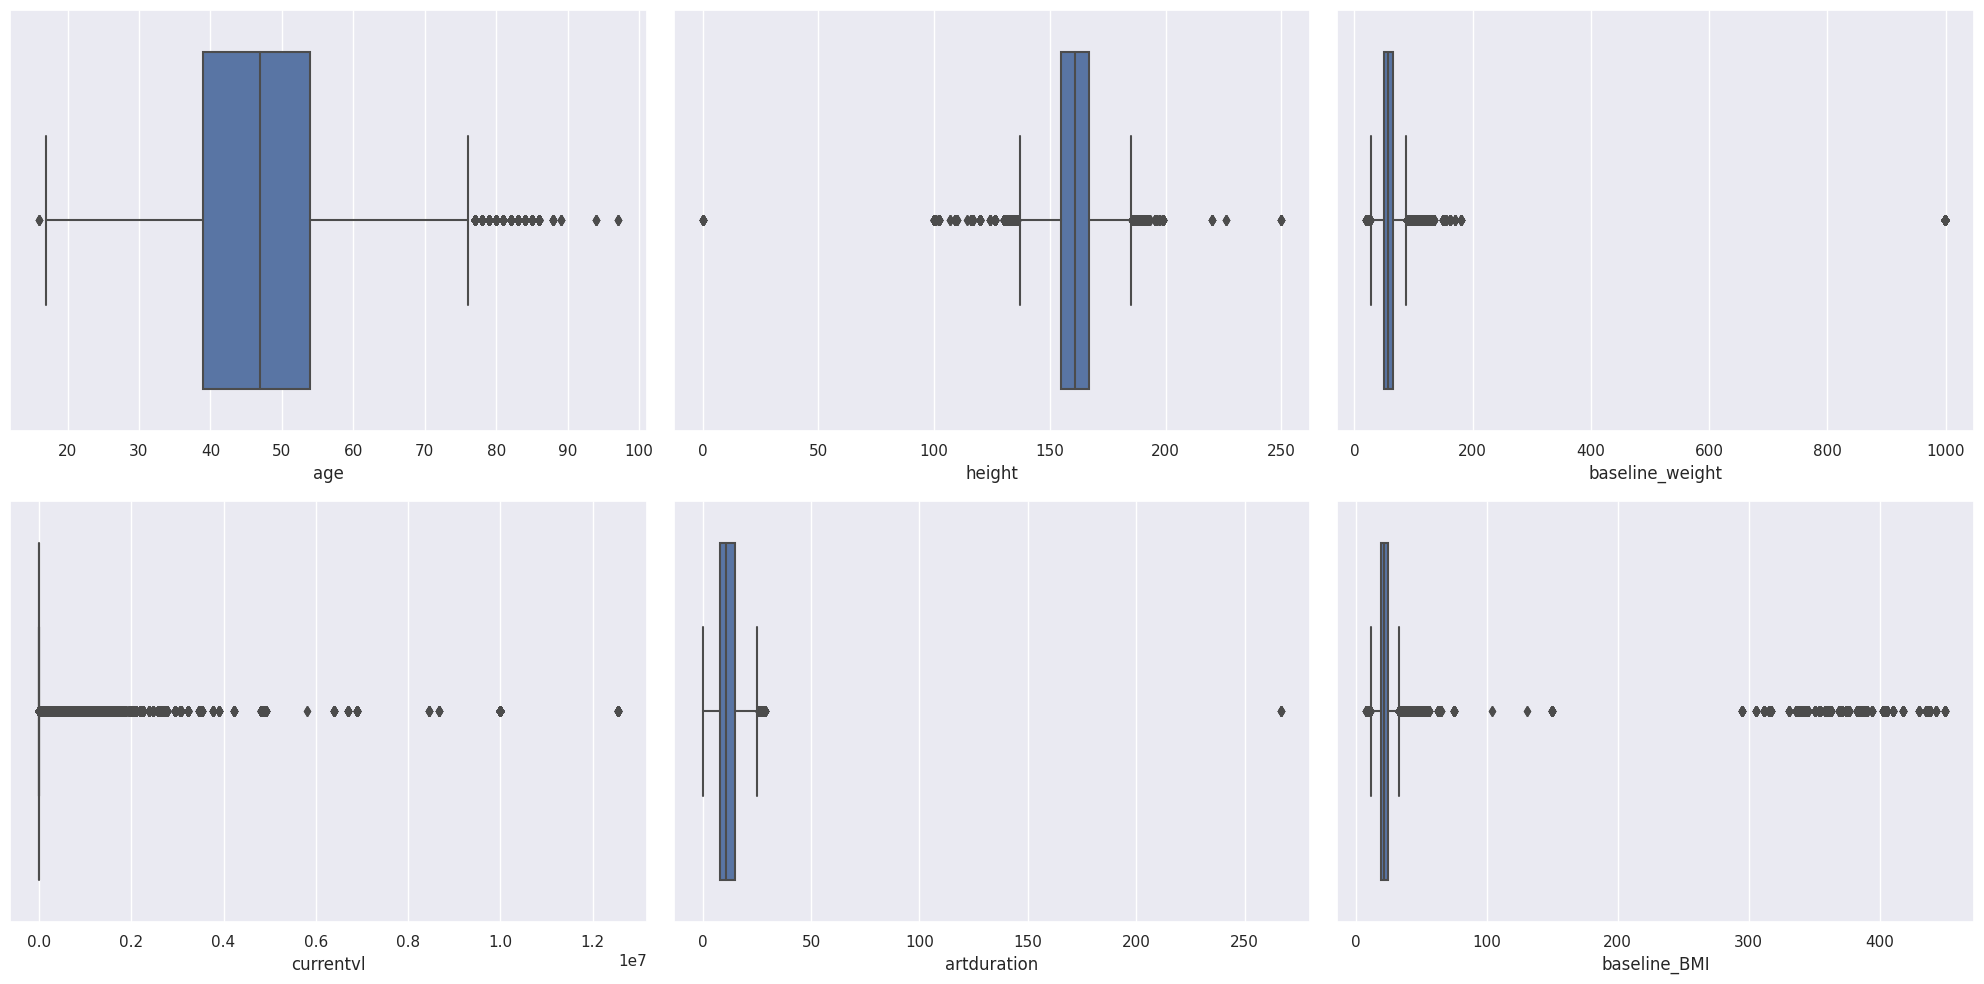

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' and a list of column names to convert to numeric
columns_to_convert = ['age', 'height', 'baseline_weight','currentvl', 'artduration', 'baseline_BMI']

# Use pd.to_numeric() to convert the specified columns to numeric
unique_ids_df[columns_to_convert] = unique_ids_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Create a list of non-empty columns to plot
non_empty_cols = [var for var in columns_to_convert if df[var].notnull().any()]

# Determine the number of rows and columns for the subplot grid
num_rows = (len(non_empty_cols) - 1) // 3 + 1
num_cols = min(len(non_empty_cols), 3)

# Create subplots based on the number of non-empty columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axs = axs.flatten()

for i, var in enumerate(non_empty_cols):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# Remove any empty subplots
for j in range(len(non_empty_cols), num_rows * num_cols):
    fig.delaxes(axs[j])

plt.show()



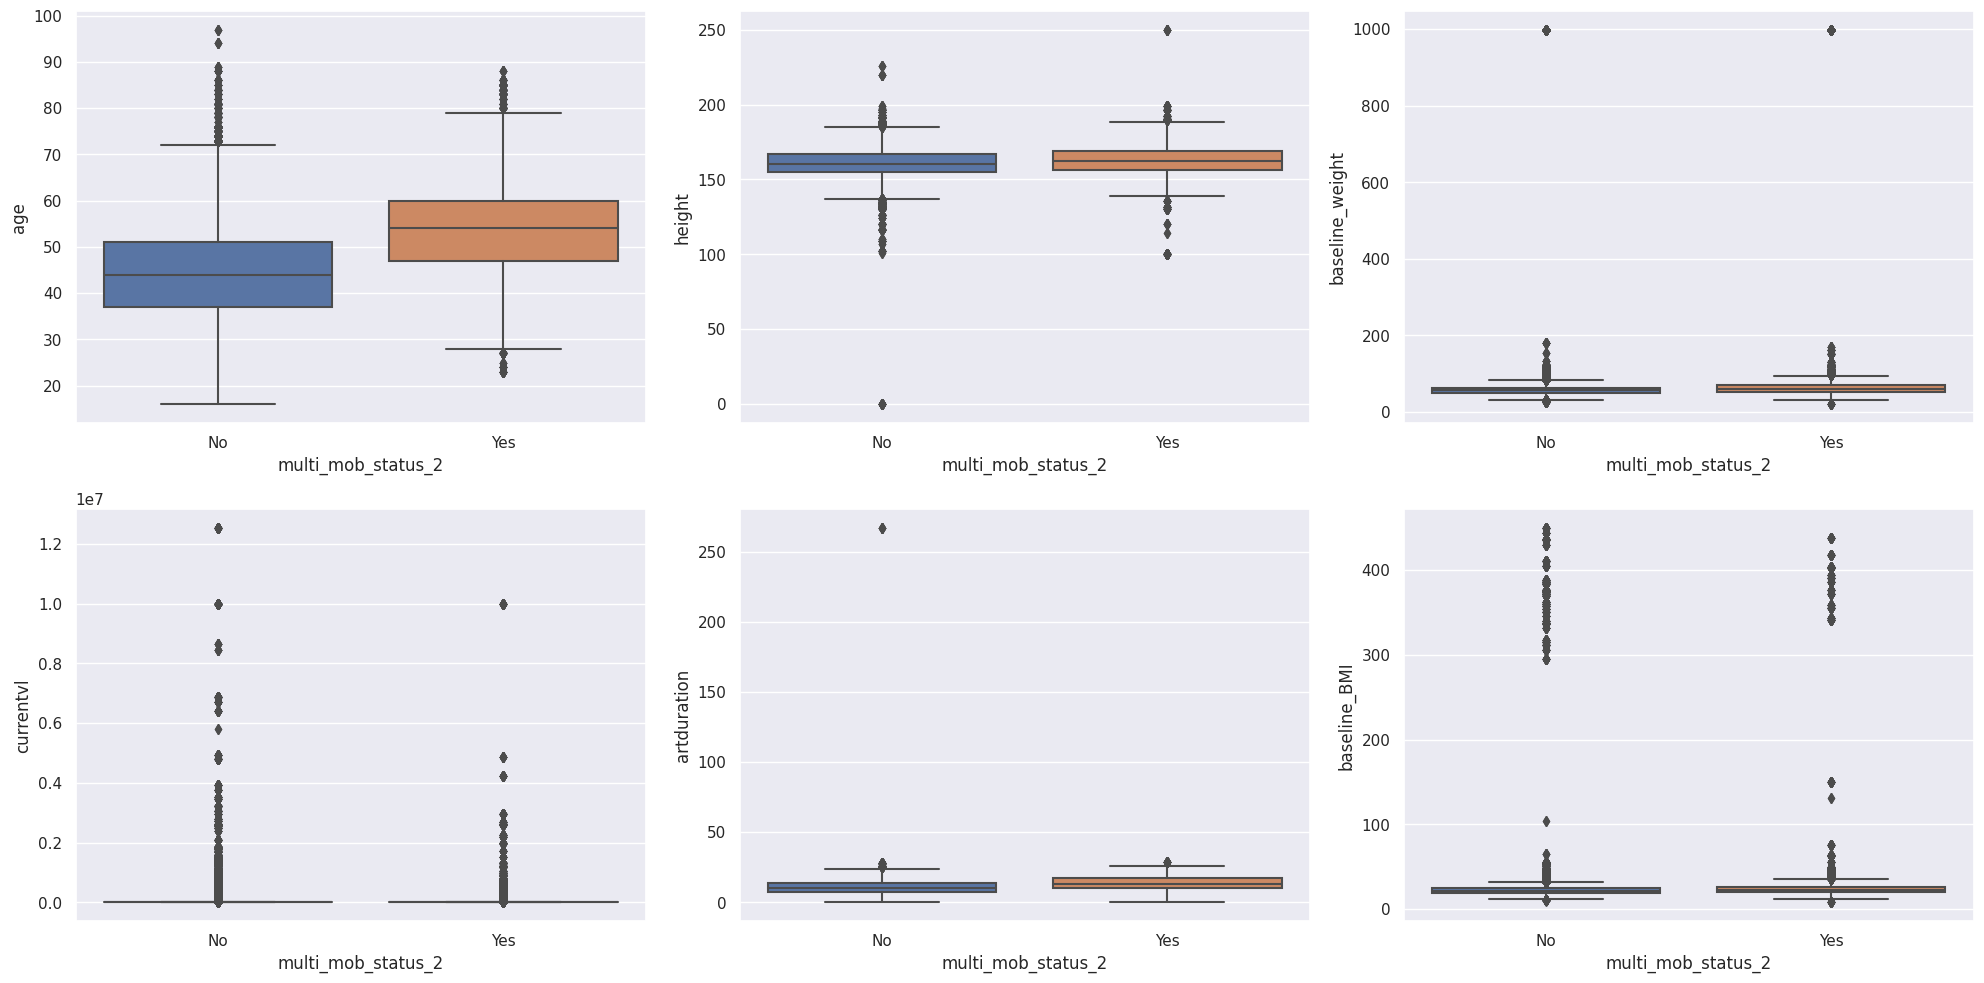

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' and a list of column names to convert to numeric
columns_to_convert = ['age', 'height', 'baseline_weight','currentvl', 'artduration', 'baseline_BMI']

# Use pd.to_numeric() to convert the specified columns to numeric
unique_ids_df[columns_to_convert] = unique_ids_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Select only the relevant columns for plotting
selected_cols = ['multi_mob_status_2'] + columns_to_convert

# Create a list of non-empty columns to plot
non_empty_cols = [var for var in columns_to_convert if df[var].notnull().any()]

# Determine the number of rows and columns for the subplot grid
num_rows = (len(non_empty_cols) - 1) // 3 + 1
num_cols = min(len(non_empty_cols), 3)

# Create subplots based on the number of non-empty columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axs = axs.flatten()

for i, var in enumerate(non_empty_cols):
    sns.boxplot(x='multi_mob_status_2', y=var, data=df, ax=axs[i])

fig.tight_layout()

# Remove any empty subplots
for j in range(len(non_empty_cols), num_rows * num_cols):
    fig.delaxes(axs[j])

plt.show()


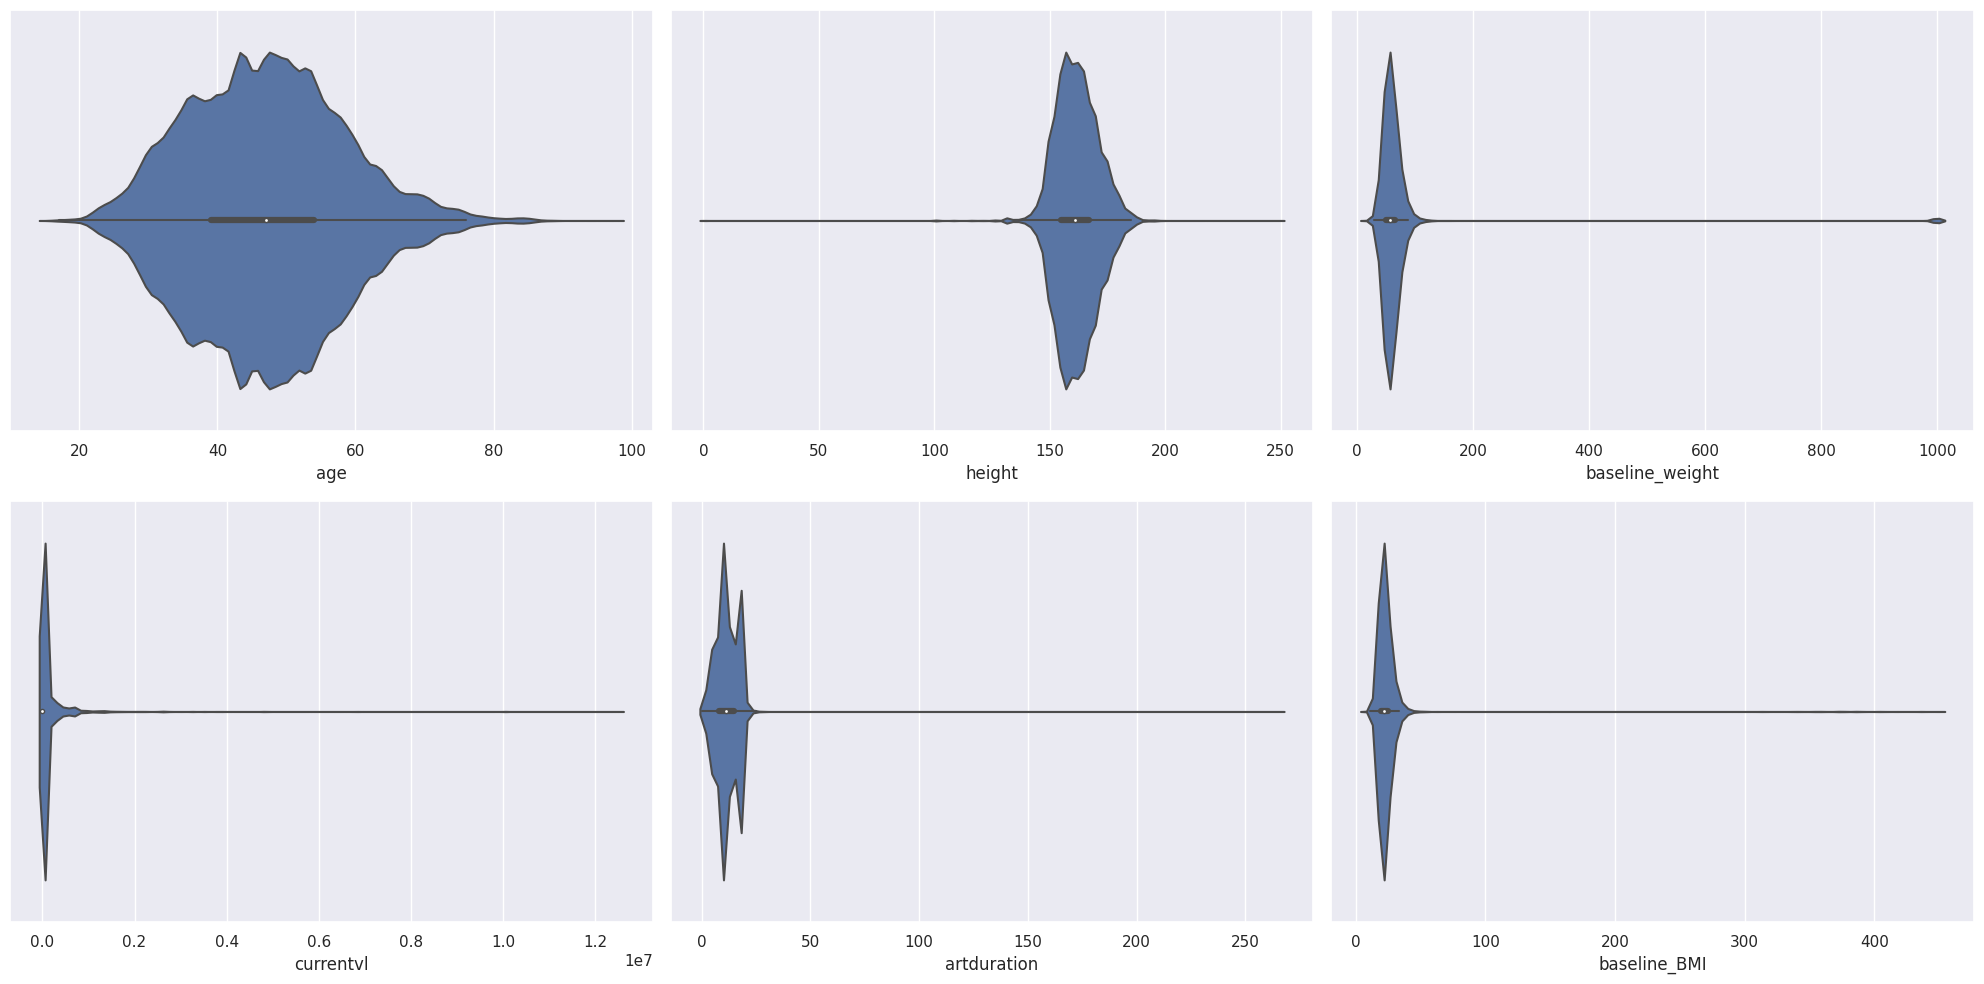

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' and a list of column names to convert to numeric
columns_to_convert = ['age', 'height', 'baseline_weight','currentvl', 'artduration', 'baseline_BMI']

# Use pd.to_numeric() to convert the specified columns to numeric
unique_ids_df[columns_to_convert] = unique_ids_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Create a list of non-empty columns to plot
non_empty_cols = [var for var in columns_to_convert if df[var].notnull().any()]

# Determine the number of rows and columns for the subplot grid
num_rows = (len(non_empty_cols) - 1) // 3 + 1
num_cols = min(len(non_empty_cols), 3)

# Create subplots based on the number of non-empty columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axs = axs.flatten()

for i, var in enumerate(non_empty_cols):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# Remove any empty subplots
for j in range(len(non_empty_cols), num_rows * num_cols):
    fig.delaxes(axs[j])

plt.show()



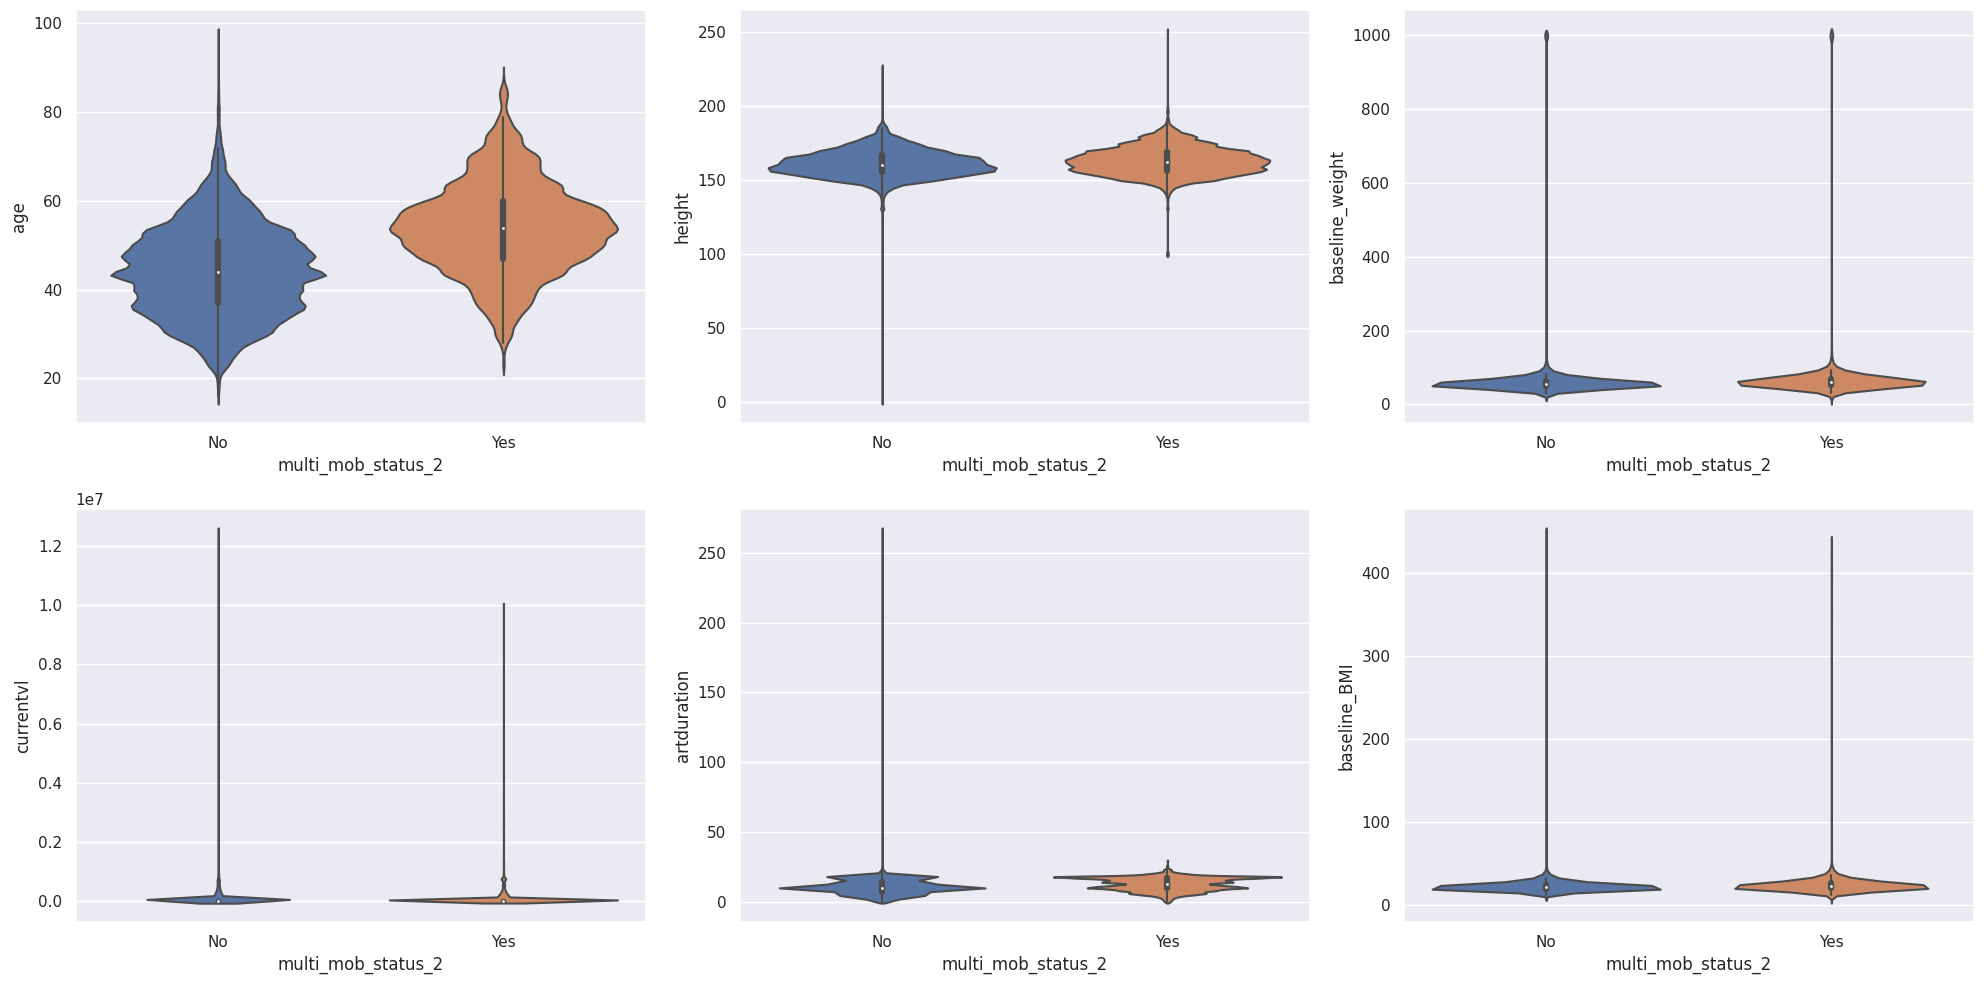

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' and a list of column names to convert to numeric
columns_to_convert = ['age', 'height', 'baseline_weight','currentvl', 'artduration', 'baseline_BMI']

# Use pd.to_numeric() to convert the specified columns to numeric
unique_ids_df[columns_to_convert] = unique_ids_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Select only the relevant columns for plotting
selected_cols = ['multi_mob_status_2'] + columns_to_convert

# Create a list of non-empty columns to plot
non_empty_cols = [var for var in columns_to_convert if df[var].notnull().any()]

# Determine the number of rows and columns for the subplot grid
num_rows = (len(non_empty_cols) - 1) // 3 + 1
num_cols = min(len(non_empty_cols), 3)

# Create subplots based on the number of non-empty columns
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axs = axs.flatten()

for i, var in enumerate(non_empty_cols):
    sns.violinplot(x='multi_mob_status_2', y=var, data=df, ax=axs[i])

fig.tight_layout()

# Remove any empty subplots
for j in range(len(non_empty_cols), num_rows * num_cols):
    fig.delaxes(axs[j])

plt.show()



DATA PROCESSING

In [132]:
#Check missing value
check_missing = unique_ids_df.isnull().sum() * 100 / unique_ids_df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

Label Encoding for each Object datatype

In [133]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in unique_ids_df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {unique_ids_df[col].unique()}")

gender: ['Female' 'Male']
education_level: ['Not specified' 'P5-P7' 'S5-S6' 'No formal education' 'S1-S4' 'P1-P4'
 'Technical/University']
followupstatus: ['Dead' 'Active' 'TransferedOut' 'Other' 'Lost']
ART_reg_type: ['EFV' 'Other' 'DTG']
age1: ['50-59' '60-69' '40-49' '70+' '30-39' '20-29' '15-19']
artduration_cat: ['6-10' '20+' '16-20' '11-15' '1-5']
curr_bmi_: ['>25' '18.6-24.9' '<18.5']
Baseline_reg_type: ['EFV' 'Other' 'DTG']
BaselineWHOstage1: ['IV' 'III' 'II' 'I']
currentvl_cat: ['Below 1000' 'Above 1000']
gender2: ['Female' 'Male']
opportunistic_inf2: ['No' 'Yes']
HPTN_status2: ['No' 'Yes']
HPTN_known2: ['No' 'Yes']
cardiac_known2: ['No' 'Yes']
alcohol_abuse_ever2: ['No' 'Yes']
tobacco_abuse_ever2: ['No' 'Yes']
multi_mob_status_2: ['No' 'Yes']
multi_mob_status2_1: ['none' 'two' 'three' 'one']
baseline_BMI_cat: ['18.5-24.9' '<18.5' '25-29' '30+']


In [134]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in unique_ids_df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(unique_ids_df[col].unique())

    # Transform the column using the encoder
    unique_ids_df[col] = label_encoder.transform(unique_ids_df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {unique_ids_df[col].unique()}")

gender: [0 1]
education_level: [1 3 5 0 4 2 6]
followupstatus: [1 0 4 3 2]
ART_reg_type: [1 2 0]
age1: [4 5 3 6 2 1 0]
artduration_cat: [4 3 2 1 0]
curr_bmi_: [2 0 1]
Baseline_reg_type: [1 2 0]
BaselineWHOstage1: [3 2 1 0]
currentvl_cat: [1 0]
gender2: [0 1]
opportunistic_inf2: [0 1]
HPTN_status2: [0 1]
HPTN_known2: [0 1]
cardiac_known2: [0 1]
alcohol_abuse_ever2: [0 1]
tobacco_abuse_ever2: [0 1]
multi_mob_status_2: [0 1]
multi_mob_status2_1: [0 3 2 1]
baseline_BMI_cat: [0 3 1 2]


Correlation Heatmap

<Axes: >

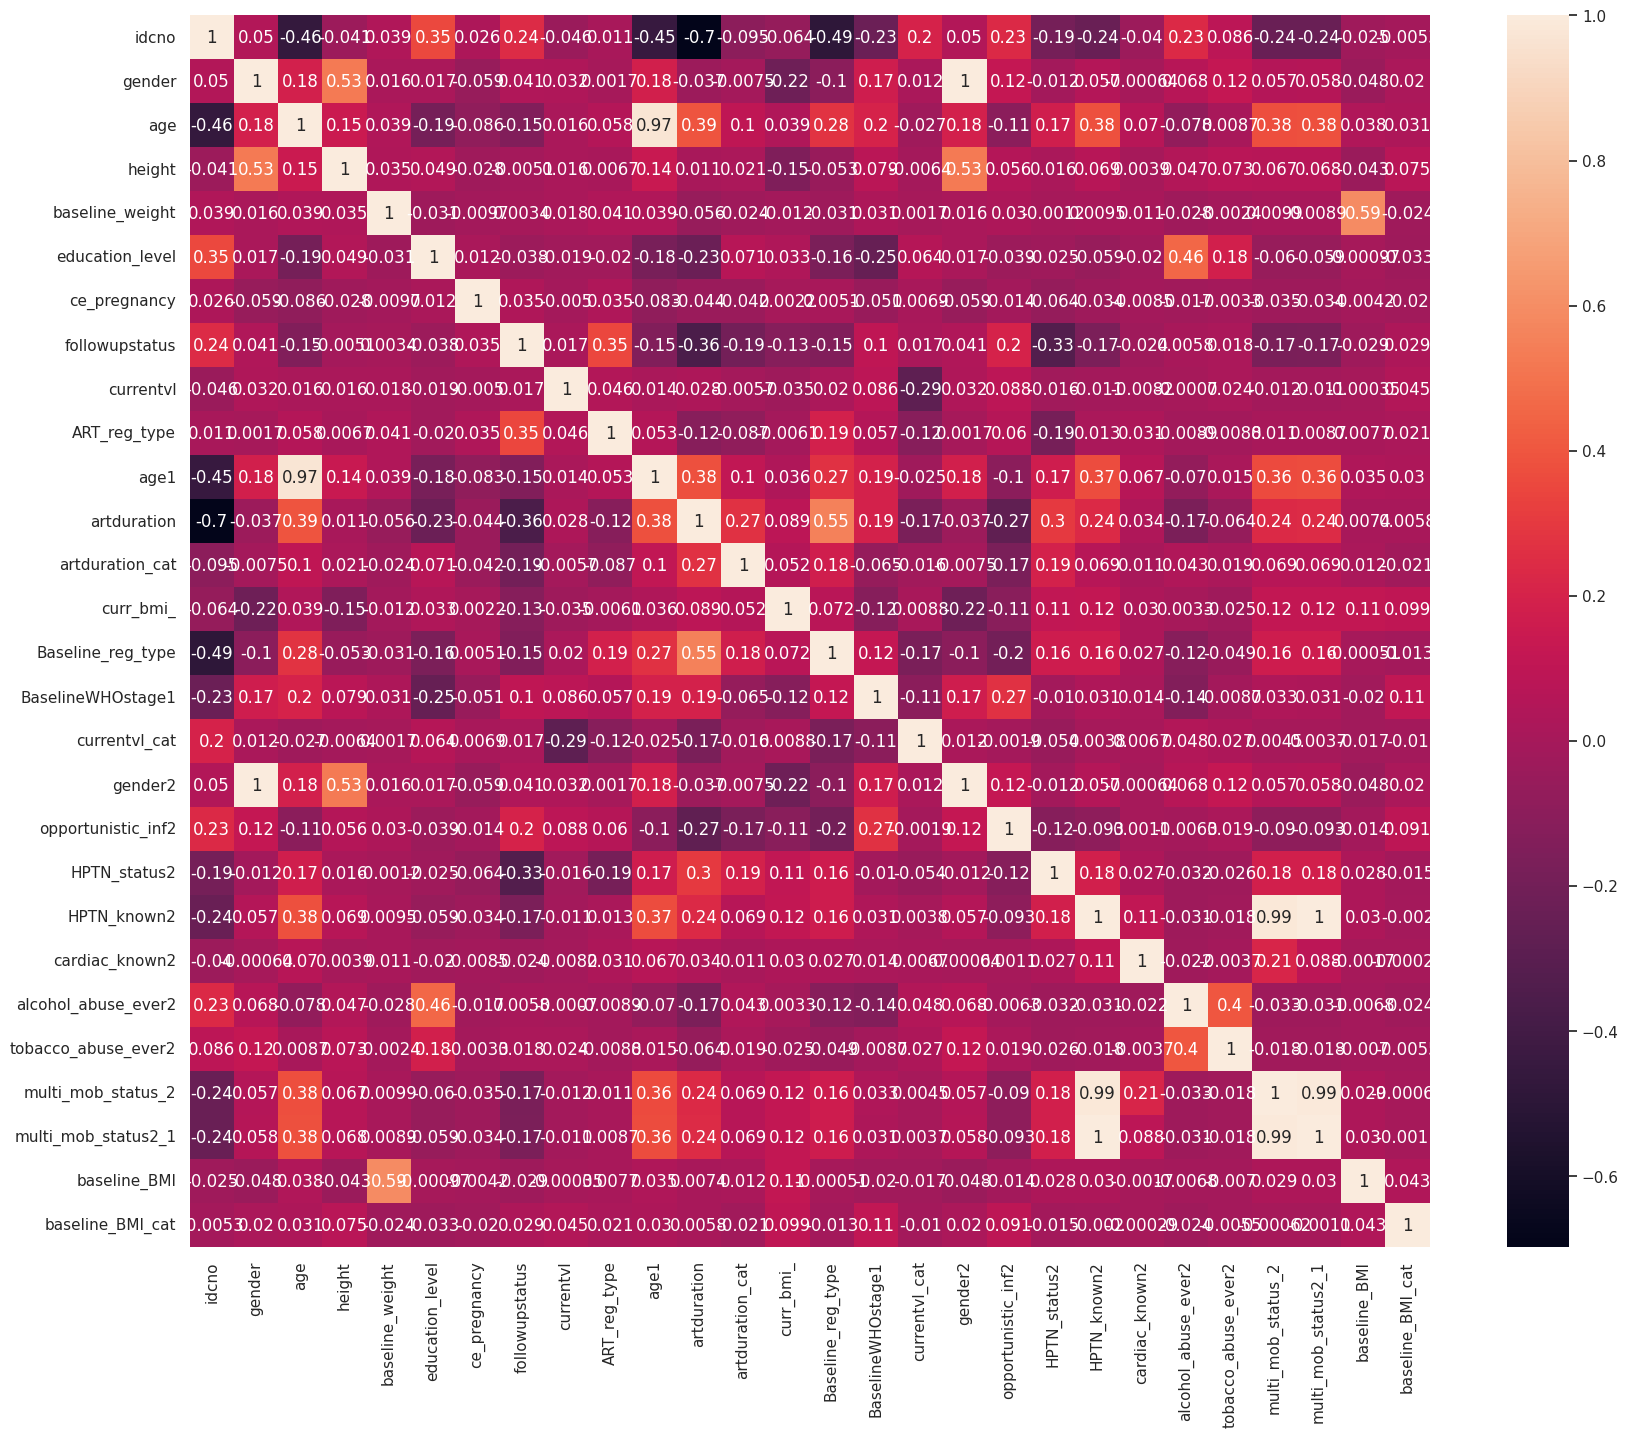

In [135]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(unique_ids_df.corr(), fmt='.2g', annot=True)

Train Test Split

In [152]:
from sklearn.model_selection import train_test_split

# Assuming you want to drop multiple columns from the DataFrame
cols_to_drop = ['multi_mob_status_2', 'HPTN_status2', 'HPTN_known2', 'cardiac_known2', 'multi_mob_status2_1', 'height','idcno']

# Select the features (X) and the target variable (y)
X = unique_ids_df.drop(columns=cols_to_drop)
y = unique_ids_df['multi_mob_status_2']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [153]:
X_train.head()


,gender,age,baseline_weight,education_level,ce_pregnancy,followupstatus,currentvl,ART_reg_type,age1,artduration,...,curr_bmi_,Baseline_reg_type,BaselineWHOstage1,currentvl_cat,gender2,opportunistic_inf2,alcohol_abuse_ever2,tobacco_abuse_ever2,baseline_BMI,baseline_BMI_cat
249670,0,26,74,3,0,0,50,0,1,5,...,2,1,0,1,0,0,0,0,32,2
270851,1,32,51,2,0,4,69281,1,2,1,...,0,0,3,1,1,1,0,0,19,0
253015,0,30,54,4,0,0,50,0,2,5,...,2,1,2,1,0,1,0,0,20,0
108969,1,64,56,2,0,0,2110,2,5,17,...,0,2,2,0,1,0,1,0,19,0
140242,0,60,47,6,0,0,75,0,5,12,...,2,2,2,1,0,0,1,0,20,0


In [154]:
data_types = X_train.dtypes
print(data_types)

gender                 int64
age                    int64
baseline_weight        int64
education_level        int64
ce_pregnancy           int64
followupstatus         int64
currentvl              int64
ART_reg_type           int64
age1                   int64
artduration            int64
artduration_cat        int64
curr_bmi_              int64
Baseline_reg_type      int64
BaselineWHOstage1      int64
currentvl_cat          int64
gender2                int64
opportunistic_inf2     int64
alcohol_abuse_ever2    int64
tobacco_abuse_ever2    int64
baseline_BMI           int64
baseline_BMI_cat       int64
dtype: object


In [155]:
print(X_train)

        gender  age  baseline_weight  education_level  ce_pregnancy  \
249670       0   26               74                3             0   
270851       1   32               51                2             0   
253015       0   30               54                4             0   
108969       1   64               56                2             0   
140242       0   60               47                6             0   
...        ...  ...              ...              ...           ...   
136841       0   39               56                3             0   
92068        0   47               88                1             0   
256628       1   42               60                2             0   
267944       0   47               50                1             0   
77384        1   50               56                1             0   

        followupstatus  currentvl  ART_reg_type  age1  artduration  ...  \
249670               0         50             0     1            5  ... 

In [156]:
data_types = X_train.dtypes
print(data_types)

gender                 int64
age                    int64
baseline_weight        int64
education_level        int64
ce_pregnancy           int64
followupstatus         int64
currentvl              int64
ART_reg_type           int64
age1                   int64
artduration            int64
artduration_cat        int64
curr_bmi_              int64
Baseline_reg_type      int64
BaselineWHOstage1      int64
currentvl_cat          int64
gender2                int64
opportunistic_inf2     int64
alcohol_abuse_ever2    int64
tobacco_abuse_ever2    int64
baseline_BMI           int64
baseline_BMI_cat       int64
dtype: object


In [157]:
X_train.isna().sum()

gender                 0
age                    0
baseline_weight        0
education_level        0
ce_pregnancy           0
followupstatus         0
currentvl              0
ART_reg_type           0
age1                   0
artduration            0
artduration_cat        0
curr_bmi_              0
Baseline_reg_type      0
BaselineWHOstage1      0
currentvl_cat          0
gender2                0
opportunistic_inf2     0
alcohol_abuse_ever2    0
tobacco_abuse_ever2    0
baseline_BMI           0
baseline_BMI_cat       0
dtype: int64

In [142]:
X_train.head()

,idcno,gender,age,baseline_weight,education_level,ce_pregnancy,followupstatus,currentvl,ART_reg_type,age1,...,curr_bmi_,Baseline_reg_type,BaselineWHOstage1,currentvl_cat,gender2,opportunistic_inf2,alcohol_abuse_ever2,tobacco_abuse_ever2,baseline_BMI,baseline_BMI_cat
249670,33471,0,26,74,3,0,0,50,0,1,...,2,1,0,1,0,0,0,0,32,2
270851,35151,1,32,51,2,0,4,69281,1,2,...,0,0,3,1,1,1,0,0,19,0
253015,33647,0,30,54,4,0,0,50,0,2,...,2,1,2,1,0,1,0,0,20,0
108969,22451,1,64,56,2,0,0,2110,2,5,...,0,2,2,0,1,0,1,0,19,0
140242,25941,0,60,47,6,0,0,75,0,5,...,2,2,2,1,0,0,1,0,20,0


In [144]:
y_train.head()

249670    0
270851    0
253015    0
108969    0
140242    1
Name: multi_mob_status_2, dtype: int64

In [ ]:
y_train.isna().sum()

0

In [158]:
# Get the list of columns
columns_list = X_train.columns.tolist()

print(columns_list)

['gender', 'age', 'baseline_weight', 'education_level', 'ce_pregnancy', 'followupstatus', 'currentvl', 'ART_reg_type', 'age1', 'artduration', 'artduration_cat', 'curr_bmi_', 'Baseline_reg_type', 'BaselineWHOstage1', 'currentvl_cat', 'gender2', 'opportunistic_inf2', 'alcohol_abuse_ever2', 'tobacco_abuse_ever2', 'baseline_BMI', 'baseline_BMI_cat']


Decision Tree

In [159]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=12, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, random_state=0)

In [160]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 69.6 %


In [161]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.6960034013605442
Precision Score :  0.6960034013605442
Recall Score :  0.6960034013605442
Jaccard Score :  0.5337463319204434


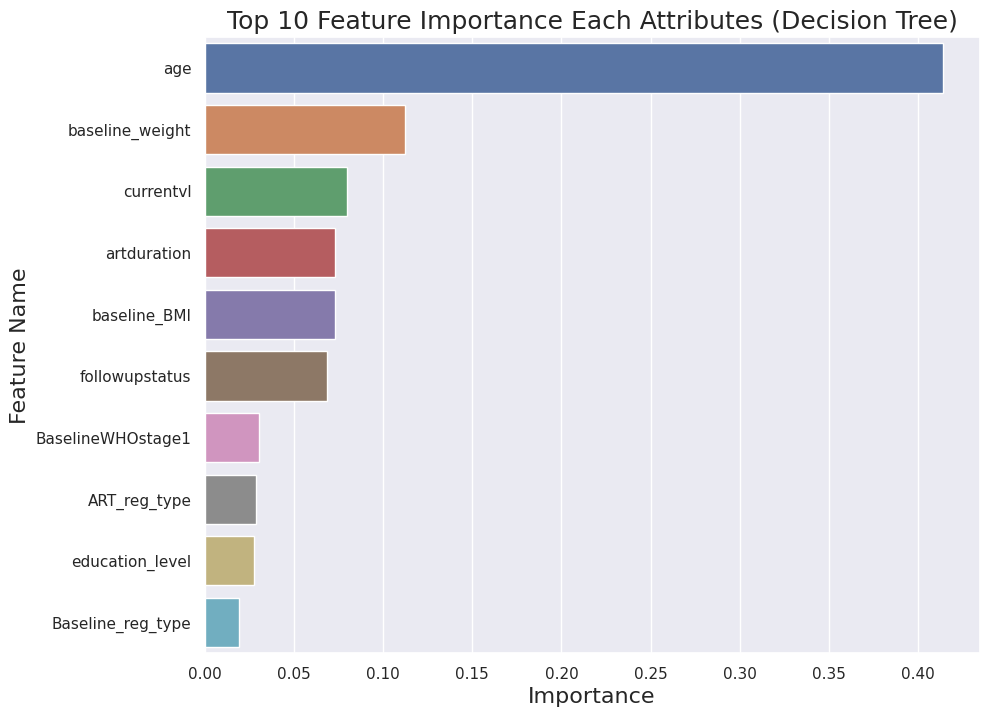

In [162]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.2 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


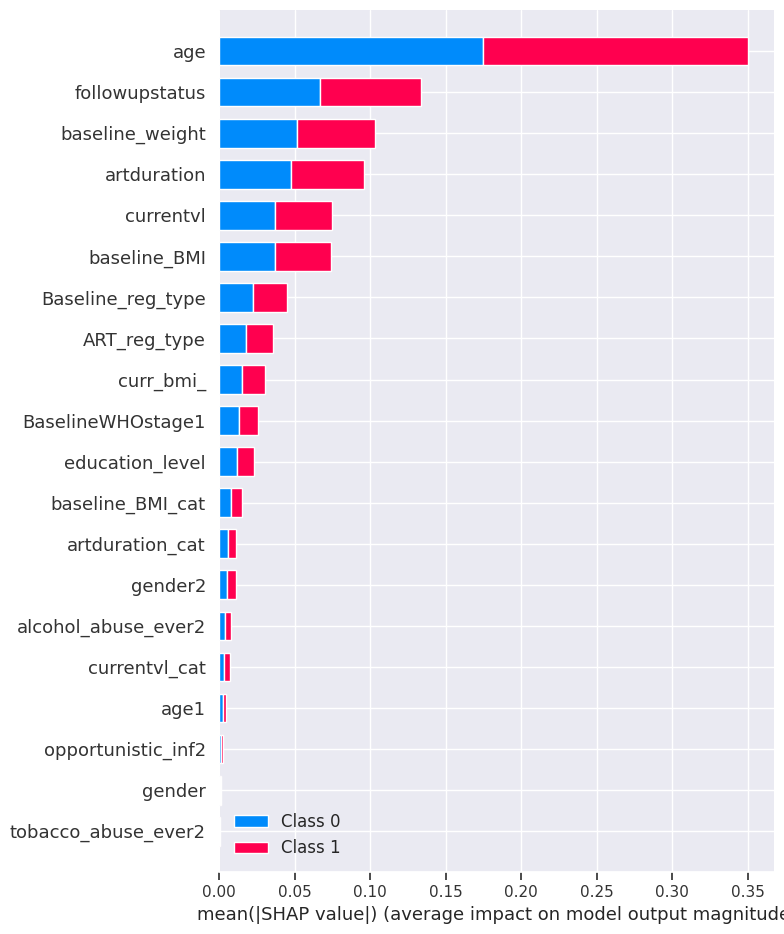

In [164]:
!pip install shap
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


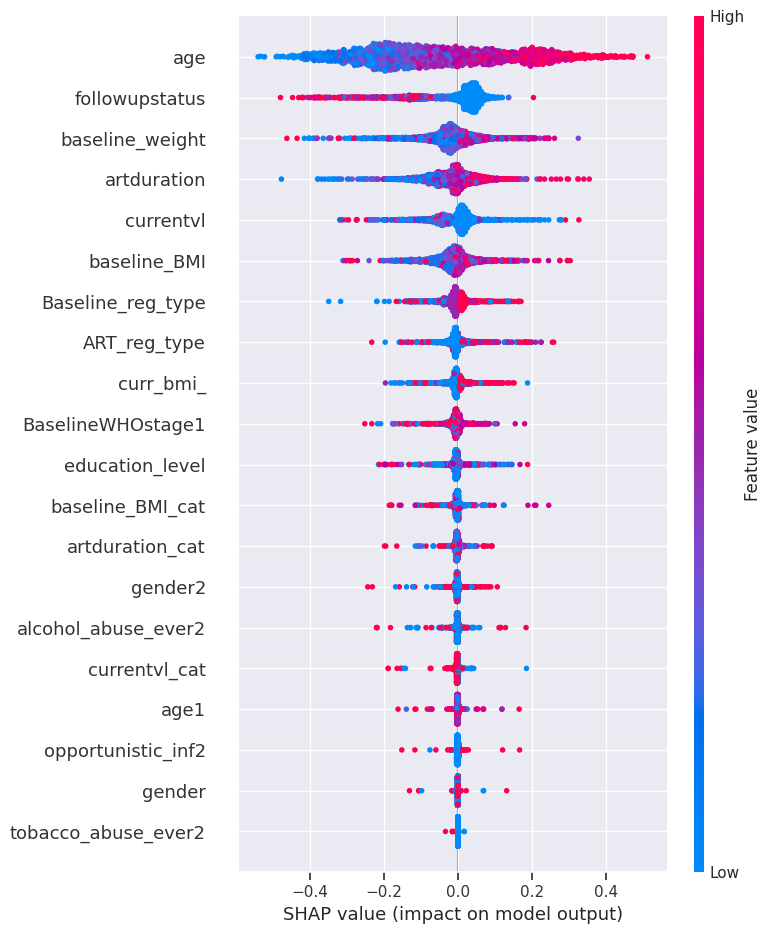

In [165]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


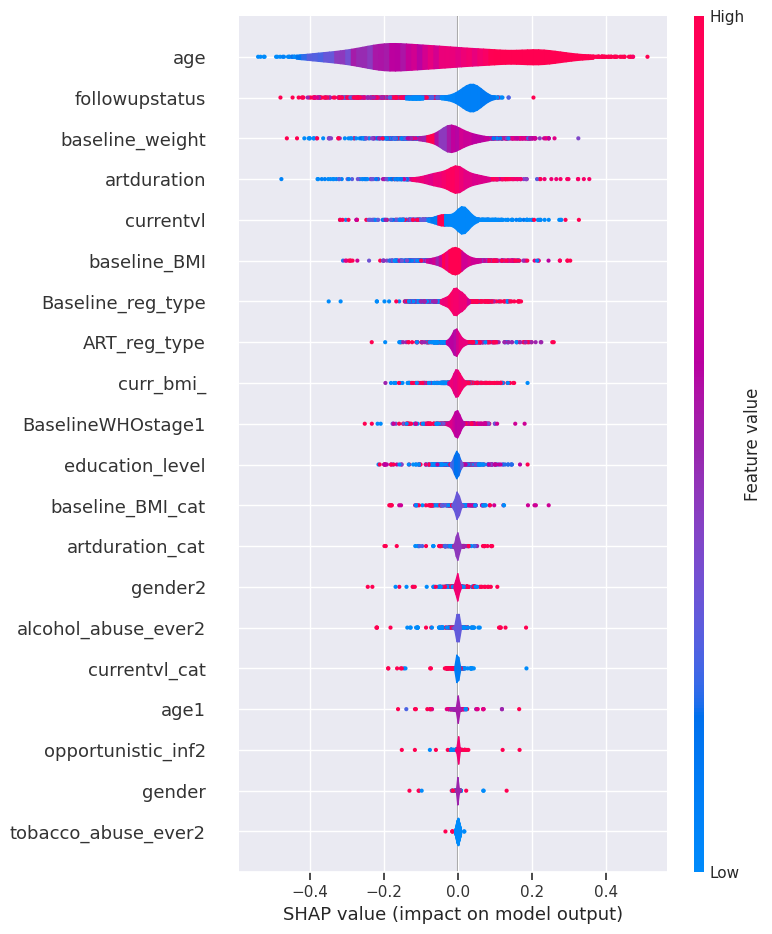

In [166]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns, plot_type="violin")

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.6960034013605442')

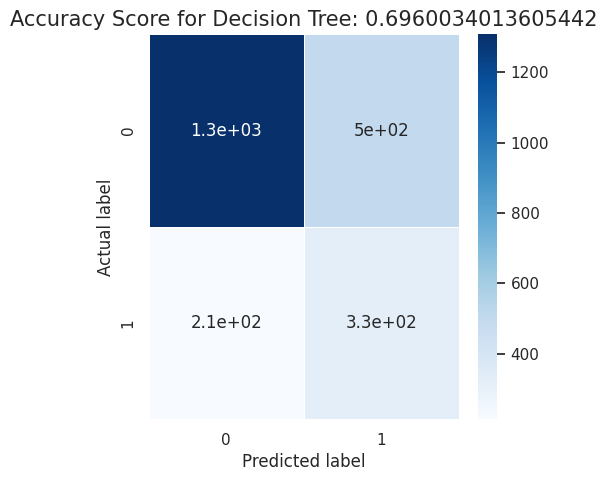

In [167]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

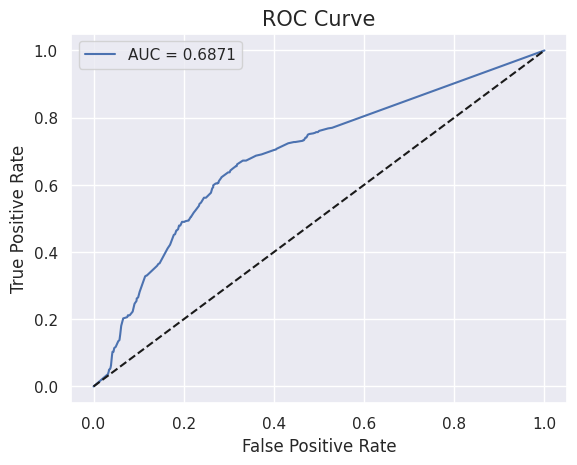

In [168]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()



***RANDOM FOREST***


In [169]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=0)

In [170]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 79.25 %


In [171]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7925170068027211
Precision Score :  0.7925170068027211
Recall Score :  0.7925170068027211
Jaccard Score :  0.6563380281690141
Log Loss :  7.478445090939273


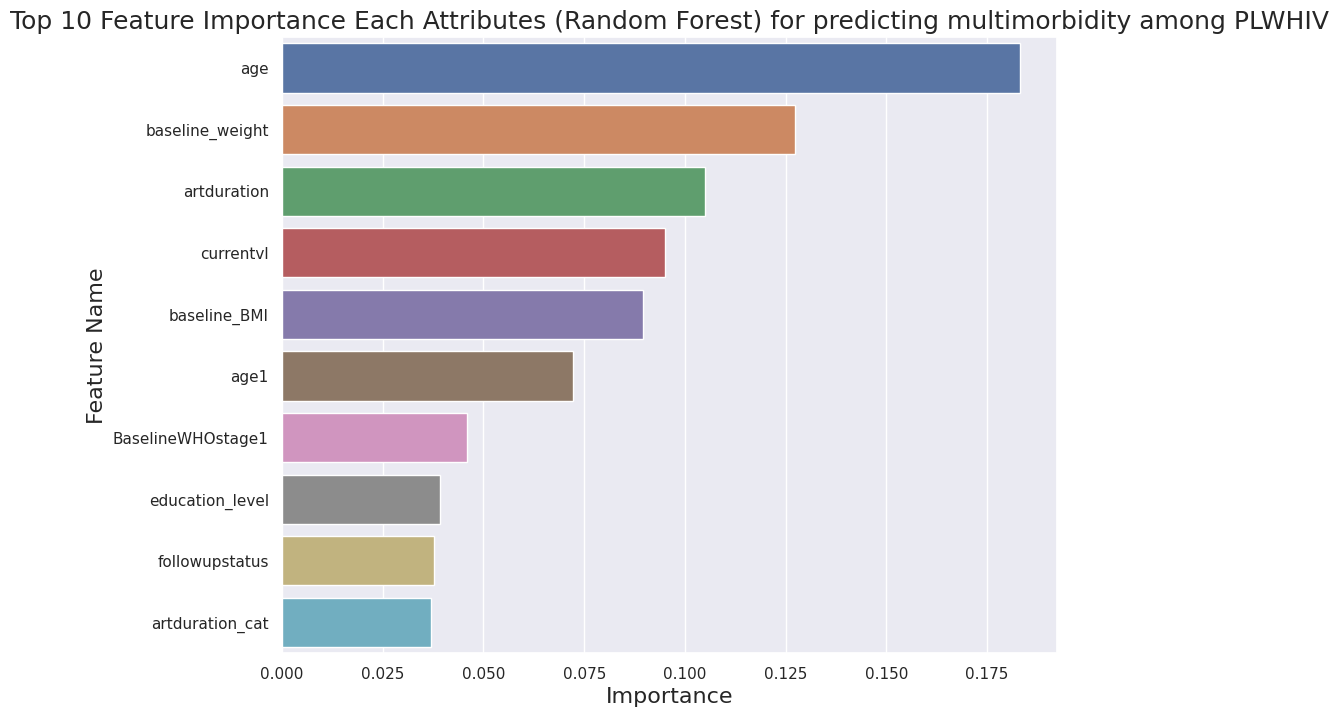

In [173]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest) for predicting multimorbidity among PLWHIV', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()